# Mediation Data Explorer

Model as bipartite graph. Biadjacency matrix has mediations in rows and actors in cells.

## Vertices

Some network analysis using the following vertices:

- Mediation: we have an integer identifier along with metadata:
    - Date
    - Conflict locale (all Sudan)
    - Conflict sub-locale
    - Location of negotiations
    - Negotiation type
- Actor:
    - Actor identifiers (use value in third-party column)
    - Actor type
    
## Edges

We require edge data because a mediation-actor relationship can take values from:

- Leading actor (Boolean)
- Actor mediation activities (set of Boolean values):
    - Good offices
    - Mediation
    - Hosting
    - Negotiating
    - Manipulating
    - Humanitarian
    
Can model edge data using integer values in matrix cells using decimal value of a binary string of length seven. These integer values are edge weights. Bit order left-to-right is:

- Is lead actor
- Good offices
- Mediation
- Hosting
- Negotiating
- Manipulating
- Humanitarian




In [1]:
__author__      = 'Roy Gardner'

%run ./mediation_functions.py


## Load the mediation-actor data

- Load data into a biadjacency matrix with mediations in rows and actors in columns
- Matrix values are zero except where a relation between a mediation and an actor exists where the value is an non-zero integer that codes the mediation-actor edge properties.
- Apart from the matrix other data are extracted or computed.
- All data are stored in data_dict




In [2]:

data_path = './data/'
mediation_file = 'mediation.csv'
actors_file = 'actors.csv'

data_dict = load_mediation_data(mediation_file,actors_file,data_path)

print(data_dict['header'])


['year', 'mediation ID', 'negotiation ID', 'conflict locale', 'conflict sub-locale', 'locale Gleditsch ID', 'third-party', 'third-party Gleditsch ID', 'location of neogitations', 'negotiation location Gleditsch ID', 'negotiation type', 'leading actor', 'leading actor 2', 'leading actor 3', 'good offices', 'mediation', 'hosting talks', 'negotiating and drafting', 'manipulating', 'humanitarian', 'witness/party to agreement', 'other', 'agreement', 'peace agreement', 'ceasfire agreement', 'agreement name', 'notes_1', 'source_1', 'note_2', 'source_2', 'note_3', 'source_3', 'note_4', 'source_4', 'note_5', 'source_5', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', '']


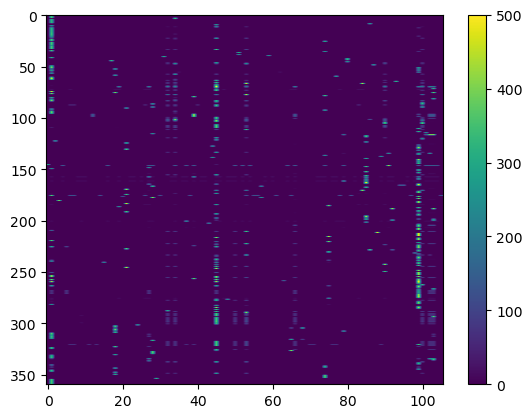

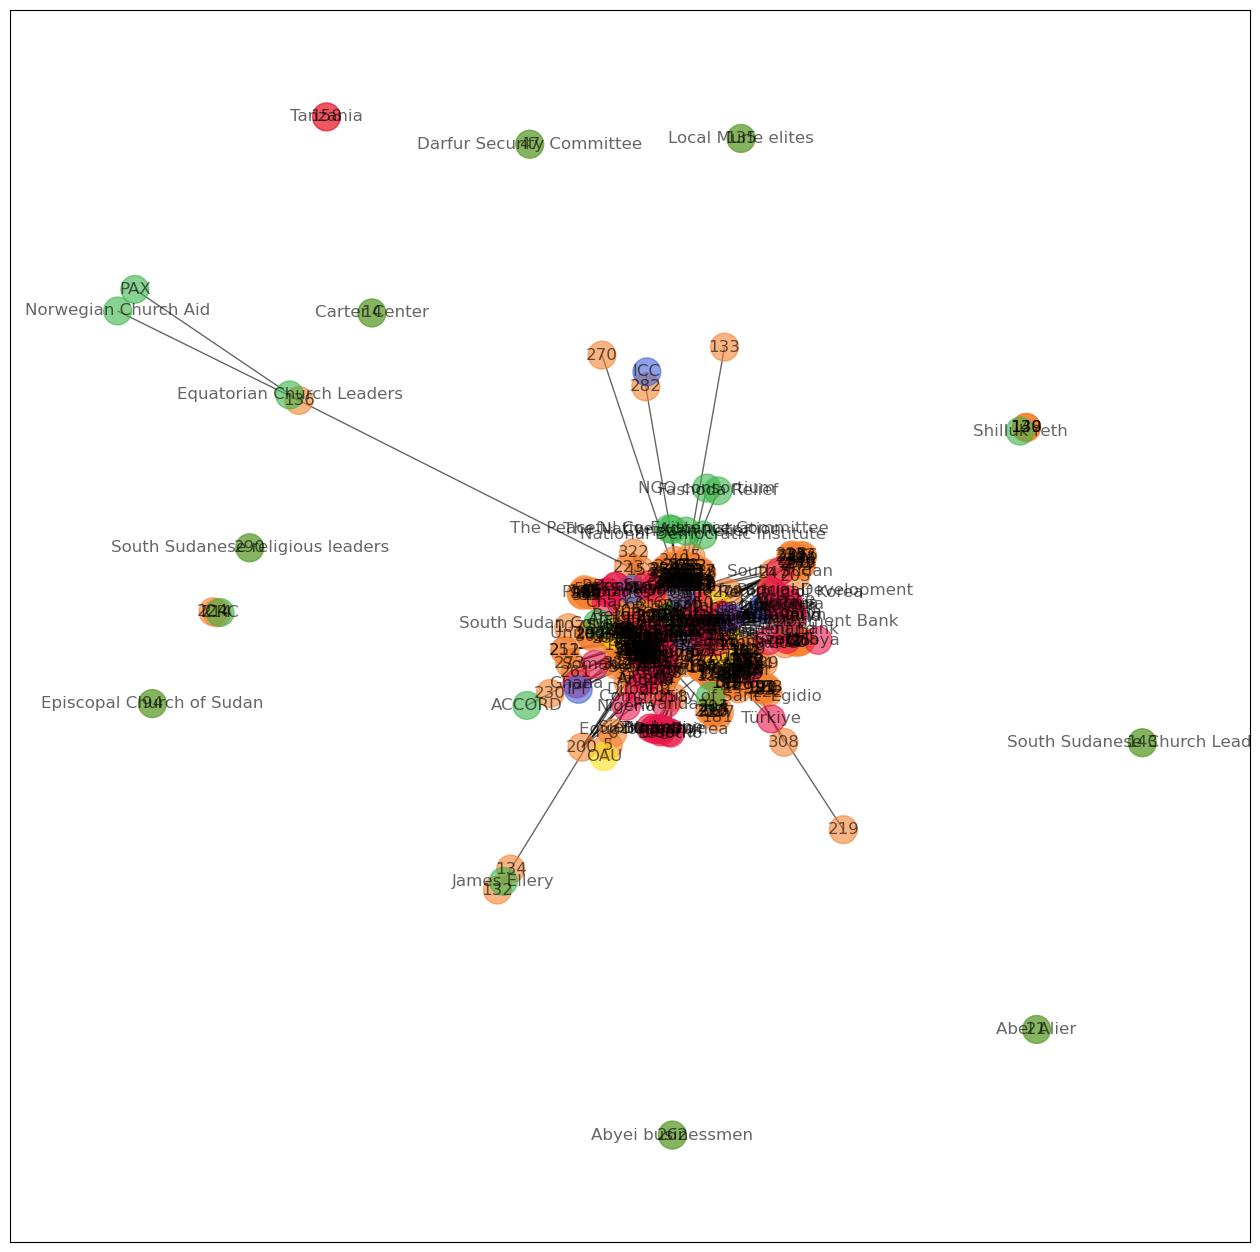

In [3]:
%run ./mediation_functions.py

plt.imshow(data_dict['matrix'],aspect='auto')
plt.colorbar()
plt.show()

adjacency_matrix,adj_vertices = adjacency_from_biadjacency(data_dict)

node_labels = {i:v for i,v in enumerate(adj_vertices)}
node_colors = [data_dict['color_map'][data_dict['vertices_dict']\
                                      [vertex_id]['type']] for\
               vertex_id in adj_vertices]

graph = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph)
f = plt.figure(figsize=(16,16))
pos = nx.spring_layout(graph) 
nx.draw_networkx(graph,pos,labels=node_labels,node_color=node_colors,\
                 node_size=400,font_size=12,alpha=0.6)
plt.grid(False)
plt.show()


## Co-occurrence

(106, 106)


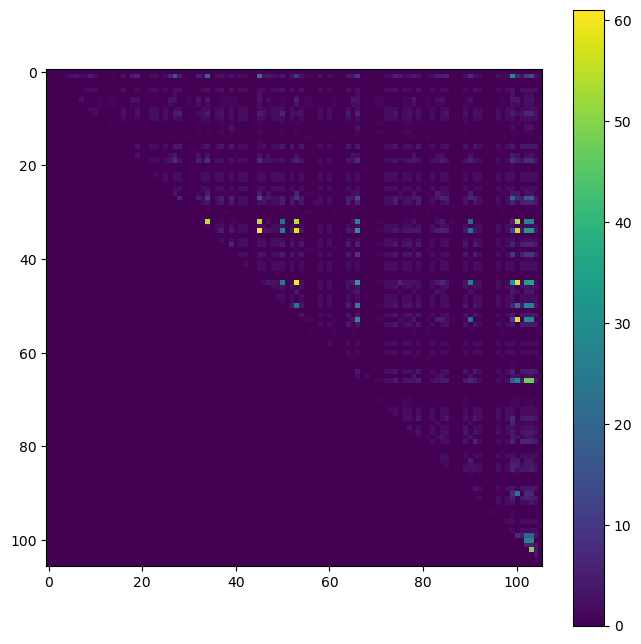

(34, 45)
Actors who are co-mediators to the greatest number of mediations: ['Ethiopia', 'IGAD']
Number of mediations: 61



In [17]:
%run ./mediation_functions.py

# Binarise the matrix
co_matrices = get_cooccurrence_matrices(data_dict['matrix'])

actor_upper = np.triu(co_matrices[0],k=1)
print(actor_upper.shape)

f = plt.figure(figsize=(8,8))
plt.imshow(actor_comatrix)
plt.colorbar()
plt.show()

# Actors with max mediations between them
indices = np.unravel_index(np.argmax(actor_upper,axis=None),actor_upper.shape)
print(indices)
actors = [data_dict['actor_vertices'][index] for index in indices]
print('Actors who are co-mediators to the greatest number of mediations:',actors)
print('Number of mediations:',actor_upper[indices])
print()



## Mediations and mediation-actor data for an actor

In [31]:
# Recover the mediations and the edge data
actor_id = 'Ethiopia'
print('Mediation engagements',actor_id, data_dict['vertices_dict'][actor_id]['type'])
mediation_data = get_mediations(actor_id,data_dict)
mediation_data = sorted(mediation_data, key=lambda t:t[2])
print('Total engagements',len(mediation_data))
print()

for t in mediation_data:
    print(t[0],data_dict['vertices_dict'][t[0]]['data'])
    edge_dict = recover_edge_dict(t[1],len(get_empty_edge_dict()))
    print(edge_dict)
    print()


Mediation engagements Ethiopia S
Total engagements 76

1 {'year': '1988', 'conflict_locale': 'Sudan', 'neg_location': 'Ethiopia', 'neg_type': 'S'}
{'is_lead': '1', 'good_offices': '0', 'mediation': '1', 'hosting': '1', 'negotiating': '1', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}

10 {'year': '1994', 'conflict_locale': 'Sudan', 'neg_location': 'Kenya', 'neg_type': 'R'}
{'is_lead': '0', 'good_offices': '0', 'mediation': '1', 'hosting': '0', 'negotiating': '0', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}

11 {'year': '1994', 'conflict_locale': 'Sudan', 'neg_location': 'Kenya', 'neg_type': 'R'}
{'is_lead': '0', 'good_offices': '0', 'mediation': '0', 'hosting': '0', 'negotiating': '1', 'manipulating': '1', 'humanitarian': '0', 'witness': '0', 'other': '0'}

12 {'year': '1994', 'conflict_locale': 'Sudan', 'neg_location': 'Kenya', 'neg_type': 'R'}
{'is_lead': '0', 'good_offices': '0', 'mediation': '1', 'hosting': '0', 'negotiating': '

## Actor engagments over time

(106, 360)


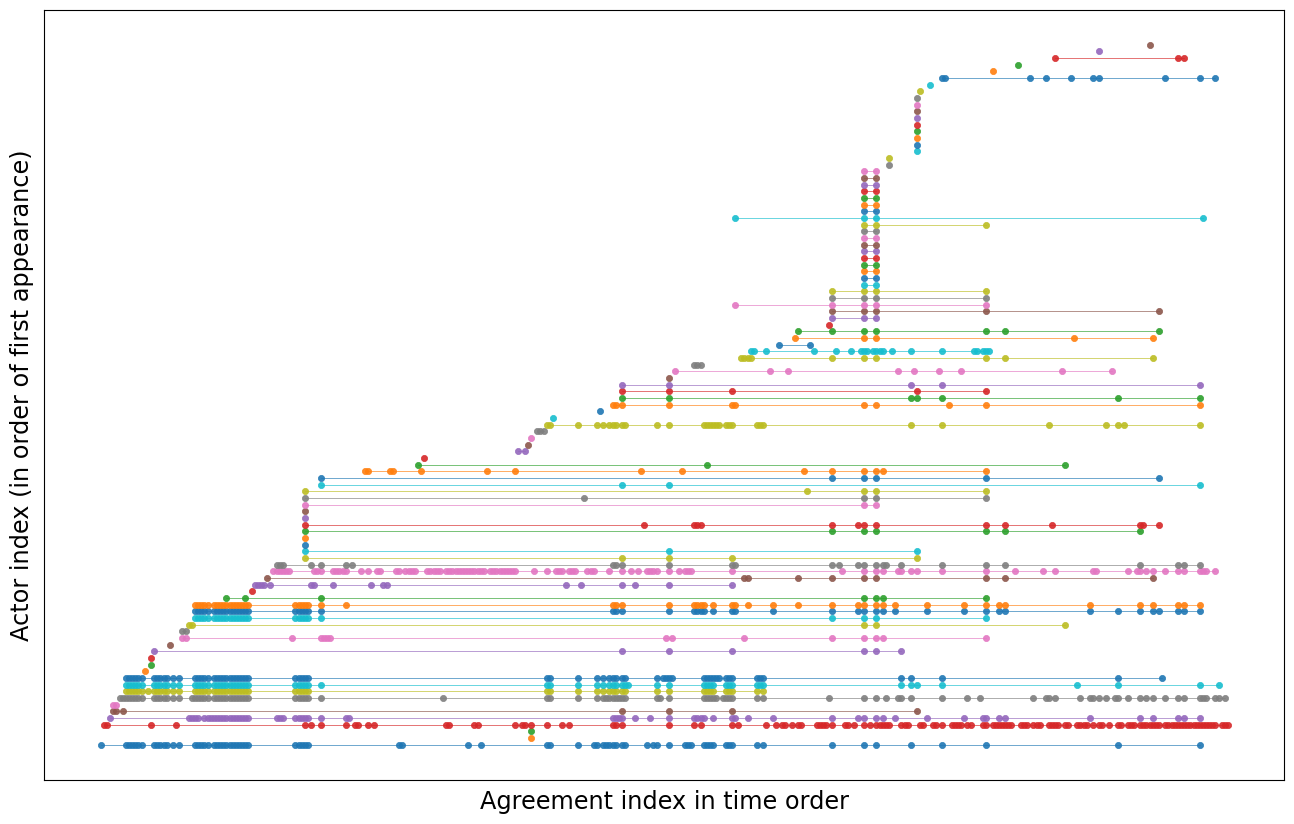

In [8]:
#print(data_dict['dates_dict'])

#print(pp_data_dict['pp_agreement_ids'])
mediation_ids = data_dict['mediation_vertices']

t_list = []
for i,mediation_id in enumerate(mediation_ids):
    mediation_date = data_dict['vertices_dict'][mediation_id]['data']['year']
    t_list.append((i,mediation_date))
# Sort by date    
t_list = sorted(t_list,key=lambda t:t[1])

# Build a time-order mediation-actor matrix
ordered_matrix = []
for t in t_list:
    ordered_matrix.append(data_dict['matrix'][t[0]])
    
ordered_matrix = np.array(ordered_matrix)
# Put actors in rows
ordered_matrix = ordered_matrix.T

print(ordered_matrix.shape)

# Now order actors by first appearance in process
row_indices = []
for i,row in enumerate(ordered_matrix):
    where = np.where(row>1)
    v = 0
    if len(where[0]) > 0:
        v = where[0][0]
    row_indices.append((i,v))
sorted_row_indices = [t[0] for t in sorted(row_indices,key=lambda t:t[1])]

sorted_matrix = ordered_matrix[np.ix_(sorted_row_indices)]

f = plt.figure(figsize=(16,10))
for i,row in enumerate(sorted_matrix):
    x = [j for j,x in enumerate(row) if x > 0]
    y = [i]*len(x)
    plt.scatter(x,y,alpha=0.9,linewidth=0.5,s=20)
    plt.plot(x,y,alpha=0.9,linewidth=0.5)
xint = range(0, sorted_matrix.shape[1])
plt.xticks([],fontsize='xx-large')    
yint = range(0, sorted_matrix.shape[1])
plt.yticks([],fontsize='xx-large')    
plt.ylabel('Actor index (in order of first appearance)',fontsize='xx-large')
plt.xlabel('Agreement index in time order',fontsize='xx-large')
plt.show()



## Integrity checks

### Actor data

- Is the lead actor always part for the set of mediation

In [ ]:
actor_dict = {}

header = data_dict['header']
actor_vertices = data_dict['actor_vertices']

for i,row in enumerate(data_dict['data']):        
    mediation_id = row[header.index('mediation ID')]
    actor = row[header.index('third-party')].strip()
    if not actor in actor_vertices:
        print(mediation_id,actor)
    lead = row[header.index('leading actor')].strip()
    if not lead in actor_vertices:
        print('LEAD',mediation_id,lead)
    lead2 = row[header.index('leading actor 2')].strip()
    if len(lead2) > 0 and not lead2 in actor_vertices:
        print('LEAD2',mediation_id,lead2)
    lead3 = row[header.index('leading actor 3')].strip()
    if len(lead3) > 0 and not lead3 in actor_vertices:
        print('LEAD2',mediation_id,lead3)


### Mediation data

In [ ]:
# Check integrity of mediation data

mediation_dict = {}

header = data_dict['header']

for i,row in enumerate(data_dict['data']):
    mediation_id = row[header.index('mediation ID')]
    if not mediation_id in mediation_dict:
        mediation_dict[mediation_id] = {}
        mediation_dict[mediation_id]['year'] = []
        mediation_dict[mediation_id]['conflict_locale'] = []
        mediation_dict[mediation_id]['conflict_sublocale'] = []
        mediation_dict[mediation_id]['negotiation_location'] = []
        mediation_dict[mediation_id]['negotiation_type'] = []
    
    year = row[header.index('year')]
    if not year in mediation_dict[mediation_id]['year']:
        mediation_dict[mediation_id]['year'].append(year)
    locale = row[header.index('conflict locale')]    
    if not locale in mediation_dict[mediation_id]['conflict_locale']:
        mediation_dict[mediation_id]['conflict_locale'].append(locale)
    sublocale = row[header.index('conflict sub-locale')]    
    if not sublocale in mediation_dict[mediation_id]['conflict_sublocale']:
        mediation_dict[mediation_id]['conflict_sublocale'].append(sublocale)
    location = row[header.index('location of neogitations')]    
    if not location in mediation_dict[mediation_id]['negotiation_location']:
        mediation_dict[mediation_id]['negotiation_location'].append(location)
    ntype = row[header.index('negotiation type')]    
    if not ntype in mediation_dict[mediation_id]['negotiation_type']:
        mediation_dict[mediation_id]['negotiation_type'].append(ntype)
    
# Do any lists have multiple values
for k,inner in mediation_dict.items():
    for l,v in inner.items():
        if len(v) > 1:
            print(k,l,v)



In [ ]:
print(data_dict['color_map'])

## Get a peace process sub-matrix

- Create the binary-valued relation matrix containing only the agreements and actors of a defined peace process.
- Data are stored in pp_data_dict


In [ ]:

process_name = 'Bosnia peace process'
#process_name = 'Yemen peace process'
#process_name = 'Chad: Doha process'
#process_name = 'DRC: Eastern DRC processes'
#process_name = 'Afghanistan: 2000s Post-intervention process'
process_name = 'Yemen Inter-group Agreements'

pp_data_dict = get_peace_process_data(process_name,data_dict)
pp_matrix = pp_data_dict['pp_matrix']

plt.imshow(pp_matrix,cmap=plt.cm.Blues)
plt.show()

# Display graph
adj_matrix,adj_vertices = adjacency_from_biadjacency(pp_data_dict)
#print(adj_vertices)
display_networkx_graph(adj_matrix,range(0,len(adj_vertices)),adj_vertices,data_dict)


## Extract values from data dictionaries

In [ ]:
print(data_dict['vertices_dict']['CON_264'])
print(pp_data_dict['pp_actor_ids'])

In [ ]:
# Get actors in alpha order
actor_options = [(vertex_id,data_dict['vertices_dict'][vertex_id][5]) for vertex_id in\
                 pp_data_dict['pp_actor_ids']]
actor_options = sorted(actor_options,key=lambda t:t[1])
actor_options = [t[0] + ': ' + t[1] for t in actor_options]

# Get agreements in date order
agreement_options = [(vertex_id,data_dict['vertices_dict'][vertex_id][5],data_dict['dates_dict'][vertex_id])\
                     for vertex_id in pp_data_dict['pp_agreement_ids']]
agreement_options = sorted(agreement_options,key=lambda t:t[2])
agreement_options = [t[0] + ': ' + t[1] for t in agreement_options]


In [ ]:
print()

## Query peace process networks

### Query based on DFS in adjacency matrix

Notes:
- That depth 2 (and above) will yield the entire graph because the graph is bipartite.
- Should be either/or with respect to entity type.


In [ ]:

# Convert a peace process biadjacency matrix to an adjacency matrix
adj_matrix,adj_vertices = adjacency_from_biadjacency(pp_data_dict)

query_vertices = ['CON_19','CON_20','CON_21']
query_vertices = ['CON_20','CON_21']
#query_vertices = ['CON_4','ARM_460']
#query_vertices = ['IGO_5','CON_20','CON_4']
#query_vertices = ['AGT_2447']
for vertex in query_vertices:
    print(vertex,data_dict['vertices_dict'][vertex][5])
print()

query_indices = [adj_vertices.index(vertex) for vertex in query_vertices]
query_matrix,found_indices = get_query_matrix(query_indices,adj_matrix,operator='OR')
display_networkx_graph(query_matrix,found_indices,adj_vertices,data_dict)


## Actor engagements over time in peace process

In [ ]:
#print(data_dict['dates_dict'])

#print(pp_data_dict['pp_agreement_ids'])
pp_ag_ids = pp_data_dict['pp_agreement_ids']

t_list = []
for i,agreement_id in enumerate(pp_ag_ids):
    if not agreement_id in data_dict['dates_dict']:
        continue
    ag_date = data_dict['dates_dict'][agreement_id]
    t_list.append((i,ag_date))
# Sort by date    
t_list = sorted(t_list,key=lambda t:t[1])
    
# Build a time-order agreement-actor matrix
ordered_matrix = []
for t in t_list:
    ordered_matrix.append(pp_data_dict['pp_matrix'][t[0]])
    
ordered_matrix = np.array(ordered_matrix)
# Put actors in rows
ordered_matrix = ordered_matrix.T

print(ordered_matrix.shape)

# Now order actors by first appearance in process
row_indices = []
for i,row in enumerate(ordered_matrix):
    where = np.where(row==1)
    v = 0
    if len(where[0]) > 0:
        v = where[0][0]
    row_indices.append((i,v))
sorted_row_indices = [t[0] for t in sorted(row_indices,key=lambda t:t[1])]

sorted_matrix = ordered_matrix[np.ix_(sorted_row_indices)]

f = plt.figure(figsize=(16,8))
for i,row in enumerate(sorted_matrix):
    x = [j for j,x in enumerate(row) if x > 0]
    y = [i]*len(x)
    plt.scatter(x,y,alpha=0.9,linewidth=0.5,s=20)
    plt.plot(x,y,alpha=0.9,linewidth=0.5)
xint = range(0, sorted_matrix.shape[1])
plt.xticks([],fontsize='xx-large')    
yint = range(0, sorted_matrix.shape[1])
plt.yticks([],fontsize='xx-large')    
plt.ylabel('Actor index (in order of first appearance)',fontsize='xx-large')
plt.xlabel('Agreement index in time order',fontsize='xx-large')
plt.show()



## Build an actor-year matrix

In [ ]:
labels = [data_dict['vertices_dict'][v][5] for v in pp_data_dict['pp_actor_ids']]
z = list(zip(range(0,len(labels)),labels))
z = sorted(z,key=lambda t:t[1])

# Get a sorted list of years

pp_ag_ids = pp_data_dict['pp_agreement_ids']

year_list = []
for i,agreement_id in enumerate(pp_ag_ids):
    if not agreement_id in data_dict['dates_dict']:
        continue
    ag_year = int(str(data_dict['dates_dict'][agreement_id])[0:4])
    year_list.append(ag_year)
# Sort by year    
year_list = sorted(set(year_list))
print(year_list)

year_matrix = np.zeros((len(pp_data_dict['pp_actor_ids']),len(year_list)))

matrix_t = pp_data_dict['pp_matrix'].T
for i,row in enumerate(matrix_t):
    for j,v in enumerate(row):
        if v == 0:
            continue
        agreement_id = pp_data_dict['pp_agreement_ids'][j]
        year = int(str(data_dict['dates_dict'][agreement_id])[0:4])
        year_index = year_list.index(year)
        year_matrix[i][year_index] += 1
        
# Get matrix in actor alpha order
ordered_year_matrix = []
for t in z:
    ordered_year_matrix.append(year_matrix[t[0]])
    
ordered_year_matrix = np.array(ordered_year_matrix)
        
        
fig = plt.figure(figsize=(16,16),layout="constrained")
plt.imshow(ordered_year_matrix,aspect='auto',cmap=plt.cm.Blues)
plt.xticks(range(0,len(year_list)),year_list,rotation=90)
plt.yticks(range(0,len(labels)),[t[1] for t in z])
cbar = plt.colorbar()
yint = range(0, math.ceil(np.amax(ordered_year_matrix))+1)
cbar.set_ticks(yint)
cbar.set_label('Signed in year',rotation=270,labelpad=15,fontsize='x-large')
plt.show()


## Compute co-occurence matrices

Paths of length 2 between actors

Use a peace process binary-valued relation matrix to compute co-occurences:
- For a pair of actors, the number of agreements in common
- For a pair of agreements, the number of actors in common


In [ ]:
co_matrices = get_cooccurrence_matrices(pp_data_dict['pp_matrix'])
actor_upper = np.triu(co_matrices[0],k=1)
agreement_upper = np.triu(co_matrices[1],k=1)

plt.imshow(actor_upper,cmap=plt.cm.Blues)
cbar = plt.colorbar()
cbar.set_label('Number of agreements',rotation=270,labelpad=15,fontsize='x-large')
plt.show()

plt.imshow(agreement_upper,cmap=plt.cm.Blues)
cbar = plt.colorbar()
cbar.set_label('Number of actors',rotation=270,labelpad=15,fontsize='x-large')
plt.show()

# Actors with max agreements between them
indices = np.unravel_index(np.argmax(actor_upper,axis=None),actor_upper.shape)
actors = [(pp_data_dict['pp_actor_ids'][index],\
           data_dict['vertices_dict'][pp_data_dict['pp_actor_ids'][index]][5]) for index in indices]
s = actors[0][1] + ' (' + actors[0][0] + ') and ' + actors[1][1] + ' (' + actors[1][0] + ')'
print('Actors who are co-signatories to the greatest number of agreements:',s)
print('Number of agreements:',actor_upper[indices])
print()

# Agreements with max actors between them
indices = np.unravel_index(np.argmax(agreement_upper,axis=None),agreement_upper.shape)
agreements = [(pp_data_dict['pp_agreement_ids'][index],\
               data_dict['vertices_dict'][pp_data_dict['pp_agreement_ids'][index]][5]) for index in indices]
s = agreements[0][1] + ' (' + agreements[0][0] + ') and ' + agreements[1][1] + ' (' + agreements[1][0] + ')'
print('Agreements with the greatest number of co-signatories:',s)
print('Number of co-signatories:',agreement_upper[indices])
print()



In [ ]:
print(data_dict['nodes_header'])

## Retrieving co-occurrence entities


### Actors

In [ ]:

actor = 'CON_4'
print('Agreements signed by',actor,get_actor_name(actor,data_dict))
agreements = get_agreements(actor,pp_data_dict)
tuples = [(agreement,get_agreement_name(agreement,data_dict)) for agreement in agreements]
tuples = sorted(tuples,key=lambda t:t[1])
for t in tuples:
    print(t[0],t[1])
print()

print('Cosignatories of',actor,get_actor_name(actor,data_dict))
cosigns = get_consignatories(actor,pp_data_dict)
tuples = [(cosign,get_actor_name(cosign,data_dict)) for cosign in cosigns]
tuples = sorted(tuples,key=lambda t:t[1])
for t in tuples:
    print(t[0],t[1])
print()

print('Cosignatories of',actor,'organised by agreement')
agreement_cosign_dict = {}
for cosign in cosigns:
    agreements = get_consignatory_agreements([actor,cosign],pp_data_dict)
    for agreement in agreements:
        if agreement in agreement_cosign_dict:
            agreement_cosign_dict[agreement].append((cosign,get_actor_name(cosign,data_dict)))
        else:
            agreement_cosign_dict[agreement] = [(cosign,get_actor_name(cosign,data_dict))]
for agreement,actors in agreement_cosign_dict.items():
    print(agreement,get_agreement_name(agreement,data_dict))
    print(actors)
    print()
print()



### Agreements

In [ ]:
print(data_dict['nodes_header'])

In [ ]:
agreement = 'AGT_1030'
print('Signatories',agreement,get_agreement_name(agreement,data_dict))
actors = get_actors(agreement,pp_data_dict)
tuples = [(actor,get_actor_name(actor,data_dict)) for actor in actors]
tuples = sorted(tuples,key=lambda t:t[1])
for t in tuples:
    print(t[0],t[1])
print()

print('Agreements with signatories in common with',agreement)
coagrees = get_coagreements(agreement,pp_data_dict)
print(coagrees)    
print()

print('Agreements with co-signatories of',agreement,'organised by cosignatory')
cosign_agreement_dict = {}
for coagree in coagrees:
    cosignatories = get_agreement_cosignatories([agreement,coagree],pp_data_dict)
    for cosign in cosignatories:
        if cosign in cosign_agreement_dict:
            cosign_agreement_dict[cosign].append(coagree)
        else:
            cosign_agreement_dict[cosign] = [coagree]
            
#print(cosign_agreement_dict)

print()

agreement_ids = []
for _,v in cosign_agreement_dict.items():
    agreement_ids.extend(v)
agreement_ids = list(set(agreement_ids))
agreements = []
for agreement_id in agreement_ids:
    agreements.append((agreement_id,get_agreement_name(agreement_id,data_dict),get_agreement_date(agreement_id,data_dict)))

agreements = sorted(agreements,key=lambda t:t[2])
for t in agreements:
    s = t[0] + ' ' + t[1] + ' [' + t[2] + ']'
    print(str(s))



In [ ]:

co_matrices = get_cooccurrence_matrices(pp_data_dict['pp_matrix'])
#print(list(co_matrices[0]))

# Find agreements that a pair of actors have in common
# Define indices for a pair of actors

actors = ['CON_20','CON_21']
actor_indices = [pp_data_dict['pp_actor_ids'].index(actor_id) for actor_id in actors]

# Number in co-occurrence cell
print(co_matrices[0][actor_indices[0]][actor_indices[1]])

# Get the row from the transpose of pp matrix
row1 = pp_data_dict['pp_matrix'].T[actor_indices[0]]
# Get the row from the pp matrix
row2 = pp_data_dict['pp_matrix'].T[actor_indices[1]]


x = np.bitwise_and(row1,row2)


#print(len(x)) # The number of agreements

for index,value in enumerate(x): 
    if value == 1:
        print(pp_data_dict['pp_agreement_ids'][index],\
              data_dict['vertices_dict'][pp_data_dict['pp_agreement_ids'][index]][5])


## Paths of length 4 

Bipartite equivalent of friend-of-a-friend. A path 4 between two actors who are not cosignatories, means there's another actor who is a cosignatory to the agreements of both actors. Therefore the mediating actor is a cosignatory with both path 4 actors, i.e., the intersection of the actor cosignatory sets.


In [ ]:
co_matrices = get_cooccurrence_matrices(pp_data_dict['pp_matrix'])

actor_2_paths = co_matrices[0]
actor_4_paths = np.linalg.matrix_power(actor_2_paths,2)

actor_2_paths[actor_2_paths != 0] = 1
actor_4_paths[actor_4_paths != 0] = 1

co_matrices = get_cooccurrence_matrices(pp_data_dict['pp_matrix'])
# Remove all actors with a path 2 
U = np.linalg.matrix_power(co_matrices[0],2) * np.bitwise_xor(actor_2_paths,actor_4_paths)

upper = np.triu(U,k=1)
plt.imshow(upper,cmap=plt.cm.Blues)
cbar = plt.colorbar()
cbar.set_label('Number of actors',rotation=270,labelpad=15,fontsize='x-large')
plt.show()

print(np.argmax(upper,axis=None))
actor_indices = np.unravel_index(np.argmax(upper,axis=None),upper.shape)
actors = [(pp_data_dict['pp_actor_ids'][index],\
           data_dict['vertices_dict'][pp_data_dict['pp_actor_ids'][index]][5]) for index in actor_indices]
print(actors)

cosigns1 = get_consignatories('CON_1',pp_data_dict)
print(sorted(cosigns1))
print()

cosigns2 = get_consignatories('ARM_460',pp_data_dict)
print(sorted(cosigns2))
print()

print(sorted(list(set(cosigns1).intersection(cosigns2))))


## Actor diagonal by stage

In [ ]:
stage_dict = {}
stage_dict['Cea'] = [1,'Ceasefire related']
stage_dict['Pre'] = [2,'Pre-negotiation process']
stage_dict['SubPar'] = [3,'Partial Framework - substantive']
stage_dict['SubComp'] = [4,'Comprehensive Framework - substantive']
stage_dict['Ren'] = [5,'Implementation Renegotiation/Renewal']
stage_dict['Imp'] = [5,'Implementation Renegotiation/Renewal']
stage_dict['Oth'] = [0,'']

# Map agreements on to stages
stage_map = {}
for i,agreement_id in enumerate(pp_data_dict['pp_agreement_ids']):
    ss_id = agreement_id.split('_')[1]
    if ss_id in data_dict['agreements_dict']:
        stage_map[i] = stage_dict[data_dict['agreements_dict'][ss_id]['Stage']][0]
    else:
        stage_map[i] = 0
    
print(len(stage_map))
print(len(pp_data_dict['pp_agreement_ids']))

print(len([v for _,v in stage_map.items() if v == 0]))


In [ ]:

co_matrices = get_cooccurrence_matrices(pp_data_dict['pp_matrix'])
actor_diag = np.diag(co_matrices[0])

# Plot

labels = [data_dict['vertices_dict'][v][5] for v in pp_data_dict['pp_actor_ids']]
z = list(zip(labels,actor_diag))
z = sorted(z,key=lambda t:t[1])
values = [t[1] for t in z]
        
        
fig = plt.figure(figsize=(16,16),layout="constrained")

gs = GridSpec(1, 6, figure=fig)
ax1 = fig.add_subplot(gs[0,0])
ax1.barh(range(0,len(actor_diag)),values)
ax1.set_yticks(range(0,len(actor_diag)),[t[0] for t in z],fontsize='large')
ax1.set_xlim(0,max(values)+5)
ax1.margins(y=0)
ax1.set_title('All Stages',fontsize='xx-large')

print(z)
print()

stage_levels = [1,2,3,4,5]
for i,stage_level in enumerate(stage_levels):
    stage_agreement_indices = [k for k,v in stage_map.items() if v == stage_level]

    stage_matrix = pp_data_dict['pp_matrix'][np.ix_(stage_agreement_indices)]

    co_matrices = get_cooccurrence_matrices(stage_matrix)
    
    # Same order as all agreements so y-axes are consistent
    actor_diag = np.diag(co_matrices[0])
    x = list(zip(labels,actor_diag))
    x = sorted(x,key=lambda t:[g[0] for g in z].index(t[0]))
    #print(x)
    print()
    
    ax = fig.add_subplot(gs[0,i+1])
    ax.barh(range(0,len(actor_diag)),[t[1] for t in x])

    ax.set_yticks([],[])
    ax.set_xlim(0,max(values)+5)
    ax.margins(y=0)
    ax.set_title('Level ' + str(stage_level),fontsize='xx-large')


fig.suptitle('Actor Signatory Counts by Agreement Stage',fontsize='xx-large')

plt.show()

In [ ]:
co_matrices = get_cooccurrence_matrices(pp_data_dict['pp_matrix'])
actor_diag = np.diag(co_matrices[0])

# Plot

labels = [data_dict['vertices_dict'][v][5] for v in pp_data_dict['pp_actor_ids']]
z = list(zip(labels,actor_diag))
z = sorted(z,key=lambda t:t[1])
print(len(z))

f = plt.figure(figsize=(8,32))
plt.barh(range(0,len(actor_diag)),[t[1] for t in z])
plt.yticks(range(0,len(actor_diag)),[t[0] for t in z],fontsize='large')
plt.xlabel('Number of agreements to which actor is signatory')
plt.show()


## Build process-actor matrix

In [ ]:
# Build a peace process-actor matrix

data_path = './data/'
nodes_file = 'node_table.csv'
links_file = 'links_table.csv'
agreements_dict = 'agreements_dict.json'

data_dict = load_agreement_actor_data(nodes_file,links_file,agreements_dict,data_path)

# Get list of peace processes
processes = get_peace_processes(data_dict)


process_matrix = np.zeros((len(processes),len(data_dict['actor_vertices'])), dtype=int)

for i,process_name in enumerate(processes):
    process_data = get_peace_process_data(process_name,data_dict)
    actor_marginal = [sum(row) for row in process_data['pp_matrix'].T]
    actor_indices = [data_dict['actor_vertices'].index(actor_id) for actor_id in process_data['pp_actor_ids']]
    for j,v in enumerate(actor_marginal):
        if v > 0:
            process_matrix[i][actor_indices[j]] = 1

plt.imshow(process_matrix,cmap=plt.cm.Blues,aspect='auto')

proc_co = get_cooccurrence_matrices(process_matrix)



In [ ]:


data_path = './data/'
nodes_file = 'node_table.csv'
links_file = 'links_table.csv'
agreements_dict = 'agreements_dict.json'

data_dict = load_agreement_actor_data(nodes_file,links_file,agreements_dict,data_path)
matrix = data_dict['matrix']


# Matrix plot routines
print(matrix.shape)
f = plt.figure(figsize=(32,32))
plt.imshow(complete_matrix,aspect='auto')
plt.show()

# Get the column marginals
col_marginals = []
for row in complete_matrix.T:
    col_marginals.append(sum(row))


plt.plot(range(0,len(col_marginals)),col_marginals)
plt.show()

max_i = col_marginals.index(max(col_marginals))
max_actor = to_vertices[max_i]
print(max_actor,vertices_dict[max_actor][5])


In [ ]:
x = np.argsort(col_marginals)[::-1][:5]
print("Indices:",x)
